In [261]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
# 시계열은 대부분 고정빈도로 표현, 특정 규칙에 따라 고정 간격을 갖게 되며, 불규칙적인 모습으로 표현될 수 도 있음
# 특정 순간 타임스탬프, 고정된 기간, 간격, 실험 혹은 경과 시간
# 가장 단순하고 널리 사용되는 시계열의 종류는 타임스탬프로 색인된 데이터

#  날짜, 시간 자료형, 도구

In [3]:
# datetime, time, calendar 묘듈

from datetime import datetime # 날짜와 시간을 모두 저장하며 마이크로초까지 지원

In [4]:
now=datetime.now()
now

datetime.datetime(2021, 2, 20, 4, 13, 26, 740189)

In [5]:
now.year, now.month, now.day

(2021, 2, 20)

In [6]:
delta=datetime(2011,1,7)-datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days, delta.seconds

(926, 56700)

In [8]:
from datetime import timedelta # timedelta를 더하거나 빼면 그만큼의 시간이 datetime객체에 적용되어 새로운 객체 생성가능

In [9]:
start=datetime(2011,1,7)

In [10]:
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start-2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

* 문자열을 datetime으로 변환하기

In [13]:
# datetime객체와 pandas의 Timestamp객체는 str메서드나 strftime메서드에 포맷 규칙을 넘겨 문자열로 나타낼 수 있다.

stamp=datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [16]:
stamp.strftime('%Y-%m-%d') # %F로 대체 가능

'2011-01-03'

In [17]:
stamp.strftime('%F')

'2011-01-03'

In [18]:
# 문자열을 날짜로 변환할 때도 사용 가능

value='2011-01-03'

In [21]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [22]:
datestrs=['7/6/2001','8/6/2011']

In [23]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2001, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [24]:
# dateutil에 포함된 parser.parse메서드로 매번 포맷 규칙을 써야하는 datetime.strptime 대체

from dateutil.parser import parse

In [25]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [26]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [27]:
parse('6/12/2011', dayfirst=True) # 국제 로케일의 경우 (날짜가 월 앞)

datetime.datetime(2011, 12, 6, 0, 0)

In [28]:
# to_datetime 메서드는 많은 종류의 날짜 표현을 처리

datestrs=['2011-07-06 12:00:00','2011-08-06 00:00:00']

In [29]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [31]:
idx=pd.to_datetime(datestrs + [None]) # 누락된 값으로 간주되어야 할 값도 처리
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [32]:
idx[2] # NaT(Not a Time)는 pandas에서 누락된 타임스탬프 데이터를 나타냄

NaT

In [33]:
pd.isnull(idx)

array([False, False,  True])

# 시계열 기초

In [34]:
# pandas에서 가장 기본적인 시계열 객체의 종류는 파이썬 문자열, datetime 객체로 표현된 타임스탬프 색인 Series

dates=[datetime(2011,1,2),datetime(2011,1,5),
      datetime(2011,1,7),datetime(2011,1,8),
      datetime(2011,1,10),datetime(2011,1,12)]

In [35]:
ts=pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -2.039234
2011-01-05   -0.286848
2011-01-07    0.543588
2011-01-08   -1.043675
2011-01-10   -0.144022
2011-01-12    0.494357
dtype: float64

In [36]:
ts.index # 내부적으로 datetime객체는 DatetimeIndex에 들어 있으며 ts 변수의 타입은 TimeSeries이다.

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [37]:
ts+ts[::2] # 다른 Series와 마찬가지로 다른 색인 시계열 객체 간의 산술 연산은 자동으로 날짜에 맞춰짐

2011-01-02   -4.078467
2011-01-05         NaN
2011-01-07    1.087175
2011-01-08         NaN
2011-01-10   -0.288045
2011-01-12         NaN
dtype: float64

In [38]:
ts.index.dtype # pandas는 Numpy의 datetime64자료형을 사용해서 나노초의 정밀도를 가지는 타임스탬프를 저장

dtype('<M8[ns]')

In [39]:
stamp=ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

* 색인, 선택, 부분선택

In [42]:
# 시계열은 라벨에 기반해 데이터를 선택하고 인덱싱할 때 pandas.Series와 동일하게 동작

stamp=ts.index[2]
ts[stamp]

0.5435876203443633

In [43]:
ts['1/10/2011']

-0.1440223691346131

In [44]:
ts['20110110']

-0.1440223691346131

In [46]:
# 긴 시계열은 연 또는 월을 넘겨 데이터의 일부 구간만 선택 가능

long_ts = pd.Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
long_ts

2000-01-01    0.169290
2000-01-02    2.168034
2000-01-03    0.361345
2000-01-04    1.055344
2000-01-05    0.603972
                ...   
2002-09-22    0.514070
2002-09-23    0.704455
2002-09-24   -0.240559
2002-09-25    0.705593
2002-09-26    0.913172
Freq: D, Length: 1000, dtype: float64

In [47]:
long_ts['2001'] # 문자열 '2001'은 연도로 해석

2001-01-01   -1.490531
2001-01-02   -3.648258
2001-01-03   -0.200386
2001-01-04   -0.418042
2001-01-05    0.954893
                ...   
2001-12-27    0.120266
2001-12-28   -0.333314
2001-12-29    0.322416
2001-12-30    0.047740
2001-12-31   -1.352469
Freq: D, Length: 365, dtype: float64

In [48]:
long_ts['2001-05'] 

2001-05-01    0.995776
2001-05-02   -0.331564
2001-05-03   -0.330245
2001-05-04   -0.067961
2001-05-05   -0.073520
2001-05-06   -0.688572
2001-05-07   -0.425953
2001-05-08    0.654846
2001-05-09   -0.100911
2001-05-10   -1.502770
2001-05-11   -0.171762
2001-05-12    1.663487
2001-05-13    1.340790
2001-05-14    0.785336
2001-05-15   -0.039839
2001-05-16    0.014217
2001-05-17    0.628559
2001-05-18    2.889107
2001-05-19   -0.256044
2001-05-20   -0.820454
2001-05-21    0.557888
2001-05-22    1.622376
2001-05-23   -0.085699
2001-05-24    1.120513
2001-05-25   -1.140708
2001-05-26    0.263907
2001-05-27   -1.391179
2001-05-28   -1.001364
2001-05-29   -0.807337
2001-05-30   -0.604130
2001-05-31    0.823757
Freq: D, dtype: float64

In [49]:
# datetime객체로 데이터를 잘라내는 작업은 일반적인 Series와 동일한 방식으로 가능

ts[datetime(2011,1,7):]

2011-01-07    0.543588
2011-01-08   -1.043675
2011-01-10   -0.144022
2011-01-12    0.494357
dtype: float64

In [50]:
ts

2011-01-02   -2.039234
2011-01-05   -0.286848
2011-01-07    0.543588
2011-01-08   -1.043675
2011-01-10   -0.144022
2011-01-12    0.494357
dtype: float64

In [51]:
ts['1/6/2011':'1/11/2011'] # 시계열에 포험허자 않고 타임스탬프를 이용하여 Series를 나눌 수 있다, 원본 시계열에 대한 뷰 생성!

2011-01-07    0.543588
2011-01-08   -1.043675
2011-01-10   -0.144022
dtype: float64

In [53]:
ts.truncate(after='1/9/2011') # truncate메서드는 TimeSeries를 두 개의 날짜로 나눈다.

2011-01-02   -2.039234
2011-01-05   -0.286848
2011-01-07    0.543588
2011-01-08   -1.043675
dtype: float64

In [54]:
dates=pd.date_range('1/1/2000',periods=100, freq='W-WED') # DataFrame에서도 동일하게 적용되며 로우에 인덱싱됨

In [56]:
long_df=pd.DataFrame(np.random.randn(100,4),
                    index=dates,
                    columns=['Colorado','Texas','New York','Ohio'])
long_df['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.343033,1.047770,-1.040828,-0.468760
2001-05-09,-0.344366,-1.184943,0.299409,-1.167458
2001-05-16,-0.085954,1.757861,-0.972822,0.772168
2001-05-23,1.015246,-1.113771,-1.063847,0.715001
2001-05-30,0.766763,2.660763,-0.716668,-2.603596


* 중복된 색인을 갖는 시계열

In [60]:
# 여러 데이터가 특정 타임스탬프에 몰려 있는 경우

dates=pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])

In [61]:
dup_ts=pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [62]:
dup_ts.index.is_unique # is_unique 속성을 통해 색인이 유일하지 않음을 확인

False

In [63]:
dup_ts['1/3/2000'] # 중복 없음-> 스탈라 값 생성

4

In [64]:
dup_ts['1/2/2000'] # 중복 있음-> 슬라이스 생성

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [65]:
grouped=dup_ts.groupby(level=0) # groupby에 level=0(단일 단계 인덱싱)을 넘겨 유일하지 않은 타임스탬프를 가지는 데이터를 집계

In [66]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [68]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 날짜 범위, 빈도, 이동

In [69]:
# pandas에서 일반적인 시계열은 고정된 빈도를 갖지 않는 불규칙적인 것으로 간주
# 시계열 안에서 누락된 값이 발생할지라도 상대적인 고정 빈도에서의 작업이 요구되는 경우 존재
# pandas에서는 리샘플링, 표준 시계열 빈도 모음, 빈도 추론 그리고 고정된 빈도의 날짜 범위를 위한 도구 존재

In [70]:
ts

2011-01-02   -2.039234
2011-01-05   -0.286848
2011-01-07    0.543588
2011-01-08   -1.043675
2011-01-10   -0.144022
2011-01-12    0.494357
dtype: float64

In [75]:
resampler=ts.resample('D') # resample메서드로 예제 시계열을 고정된 일 빈도로 변환
resampler

* 날짜 범위 생성

In [76]:
# pandas.date_range를 사용하면 특정 빈도에 따라 지정한 길이만큼의 DatetimeIndex를 생성

index=pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [77]:
pd.date_range(start='2012-04-01', periods=20) # date_range는 일별 타임스탬프 생성, 시작이나 종료날짜만 넘긴다면 생성할 기간도 전달

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [78]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [80]:
# 시작과 종료날짜는 생성된 날짜 색인에 대해 엄격한 경계 정의

pd.date_range('2000-01-01','2000-12-01',freq='BM') # 각 월의 마지막 영업일을 포함하려면 빈도값으로 'BM'전달

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [81]:
# date_range는 기본적으로 시작 시간이나 종료 시간의 타임스탬프를 보존

pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [82]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True) # normalize=True로 타임스탬프를 정규화(자정에 맞춤)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

* 빈도와 날짜 오프셋

In [83]:
# pandas에서는 기본빈도와 배수의 조합으로 빈도가 이루어짐
# 기본 빈도는 보통 'M', 'H'처럼 짧은 문자열로 참조
# 각 기본 빈도에는 일반적으로 날짜 오프셋이라고 불리는 객체를 사용할 수 있음

from pandas.tseries.offsets import Hour, Minute

In [85]:
hour=Hour() # Hour클래스로 시간별 빈도 표현
hour

<Hour>

In [87]:
four_hours=Hour(4) # 이 오프셋의 곱은 정수를 넘겨서 구할 수 있다
four_hours

<4 * Hours>

In [88]:
pd.date_range('2000-01-01','2000-01-03 23:59', freq='4h') # 기본 빈도 앞에 정수를 두면 해당 빈도의 곱을 생성

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [89]:
Hour(2)+Minute(30) # 여러 오프셋을 덧셈으로 합칠 수 있다.

<150 * Minutes>

In [90]:
pd.date_range('2000-01-01',periods=10,freq='1h30min') # 빈도 문자열로 1h30min을 넘겨도 같은 표현으로 해석

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [91]:
# 월별주차: 유용한 빈도 클래스, WOM으로 시작

rng=pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI') # 매월 3째주 금요일 같은 날짜를 얻을 수 있다.
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

* 데이터 시프트

In [93]:
# 시프트는 데이터를 시간 축에서 앞이나 뒤로 이동하는 것을 의미
# Series나 DataFrame은 색인은 변경하지 않고 데이터를 앞이나 뒤로 느슨한 시프트를 수행하는 shift메서드가 있다.

ts=pd.Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    2.113271
2000-02-29    0.290473
2000-03-31    0.931107
2000-04-30    0.434005
Freq: M, dtype: float64

In [94]:
ts.shift(2) 

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    2.113271
2000-04-30    0.290473
Freq: M, dtype: float64

In [95]:
ts.shift(-2) # 이런식으로 하면 시계열의 시작이나 끝에 결측치 발생

2000-01-31    0.931107
2000-02-29    0.434005
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [96]:
# ts/ts.shift(1)-1
# shift는 일반적으로 한 시계열 내에서, 혹은 DF의 컬럼으로 표현할 수 있는 여러 시계열에서의 퍼센트 변화를 계산할 때 사용

In [97]:
ts.shift(2, freq='M') # shift에 빈도를 넘겨 타임스탬프가 확장되도록 할 수 있다.

2000-03-31    2.113271
2000-04-30    0.290473
2000-05-31    0.931107
2000-06-30    0.434005
Freq: M, dtype: float64

In [98]:
ts.shift(3, freq='D') # 다른 빈도를 넘겨 아주 유연하게 데이터를 밀거나 당길 수 있다.

2000-02-03    2.113271
2000-03-03    0.290473
2000-04-03    0.931107
2000-05-03    0.434005
dtype: float64

In [99]:
ts.shift(1, freq='90T') # 여기서 T는 분을 나타냄

2000-01-31 01:30:00    2.113271
2000-02-29 01:30:00    0.290473
2000-03-31 01:30:00    0.931107
2000-04-30 01:30:00    0.434005
dtype: float64

* 오프셋만큼 날짜 시프트하기

In [100]:
# pandas의 날짜 오프셋은 datetime이나 Timestamp 객체에서도 사용할 수 있다.

from pandas.tseries.offsets import Day, MonthEnd

In [101]:
now=datetime(2011,11,17)

In [102]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

In [103]:
now+ MonthEnd() # MonthEnd같은 앵커드 오프셋을 추가하면 빈도 규칙의 다음 날짜로 롤 포워드 됨

Timestamp('2011-11-30 00:00:00')

In [104]:
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [105]:
offset=MonthEnd()

In [106]:
offset.rollforward(now) # 앵커드 오프셋은 rollforward와 rollback메서드로 명시적으로 각각 날짜를 앞으로 밀거나 뒤로 당길 수 있다.

Timestamp('2011-11-30 00:00:00')

In [110]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [111]:
ts=pd.Series(np.random.randn(20),
             index=pd.date_range('1/15/2000',periods=20,freq='4d'))
ts

2000-01-15    1.732786
2000-01-19    0.479626
2000-01-23    0.356290
2000-01-27   -1.042831
2000-01-31   -0.314174
2000-02-04    0.820399
2000-02-08   -1.185572
2000-02-12    1.085743
2000-02-16   -0.787433
2000-02-20   -0.070983
2000-02-24    0.216005
2000-02-28    2.462569
2000-03-03    0.187682
2000-03-07   -1.210439
2000-03-11   -0.251973
2000-03-15    0.164512
2000-03-19   -0.384831
2000-03-23   -0.294117
2000-03-27    0.671439
2000-03-31    1.357700
Freq: 4D, dtype: float64

In [113]:
ts.groupby(offset.rollforward).mean() # 날짜 오프셋을 groupby와 함께 사용

2000-01-31    0.242339
2000-02-29    0.362961
2000-03-31    0.029997
dtype: float64

In [114]:
ts.resample('M').mean() # 가장 쉬운 방법은 resample사용

2000-01-31    0.242339
2000-02-29    0.362961
2000-03-31    0.029997
Freq: M, dtype: float64

# 시간대 다루기

In [115]:
# 파이썬에서 시간대 정보는 전 세계의 시간대 정보를 모아둔 올슨 데이터베이스를 담고 있는 서드파티 라이브러리 pytz에서 얻어옴

import pytz

In [116]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [119]:
tz= pytz.timezone('America/New_york') # 시간대 객체를 얻으려면 pytz.timezone을 사용
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

* 시간대 지역화와 변환

In [273]:
# pandas에서 시계열은 시간대를 엄격히 다루지 않음

rng=pd.date_range('3/9/2012 9:30',periods=6, freq='D')

In [274]:
ts=pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.724350
2012-03-10 09:30:00   -0.926959
2012-03-11 09:30:00   -0.503516
2012-03-12 09:30:00   -0.094121
2012-03-13 09:30:00    3.026241
2012-03-14 09:30:00   -0.518600
Freq: D, dtype: float64

In [275]:
print(ts.index.tz) # 색인 tz필드는 None이다.

None


In [276]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC') # 시간대를 지정해서 날짜 범위 생성

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [277]:
ts

2012-03-09 09:30:00   -0.724350
2012-03-10 09:30:00   -0.926959
2012-03-11 09:30:00   -0.503516
2012-03-12 09:30:00   -0.094121
2012-03-13 09:30:00    3.026241
2012-03-14 09:30:00   -0.518600
Freq: D, dtype: float64

In [278]:
ts_utc=ts.tz_localize('UTC') # tz_localize메서드로 지역화 시간으로의 변환
ts_utc

2012-03-09 09:30:00+00:00   -0.724350
2012-03-10 09:30:00+00:00   -0.926959
2012-03-11 09:30:00+00:00   -0.503516
2012-03-12 09:30:00+00:00   -0.094121
2012-03-13 09:30:00+00:00    3.026241
2012-03-14 09:30:00+00:00   -0.518600
Freq: D, dtype: float64

In [279]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [280]:
ts_utc.tz_convert('America/New_York') # 지역화 후 tz_convert로 다른 시간대로 변환 가능

2012-03-09 04:30:00-05:00   -0.724350
2012-03-10 04:30:00-05:00   -0.926959
2012-03-11 05:30:00-04:00   -0.503516
2012-03-12 05:30:00-04:00   -0.094121
2012-03-13 05:30:00-04:00    3.026241
2012-03-14 05:30:00-04:00   -0.518600
Freq: D, dtype: float64

In [281]:
ts_eastern=ts.tz_localize('America/New_York') # 동부 표준시로 맞춘다음 UTC 혹은 베를린 시간으로 변환 가능

In [282]:
ts_eastern.tz_convert('UTC') 

2012-03-09 14:30:00+00:00   -0.724350
2012-03-10 14:30:00+00:00   -0.926959
2012-03-11 13:30:00+00:00   -0.503516
2012-03-12 13:30:00+00:00   -0.094121
2012-03-13 13:30:00+00:00    3.026241
2012-03-14 13:30:00+00:00   -0.518600
dtype: float64

In [283]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.724350
2012-03-10 15:30:00+01:00   -0.926959
2012-03-11 14:30:00+01:00   -0.503516
2012-03-12 14:30:00+01:00   -0.094121
2012-03-13 14:30:00+01:00    3.026241
2012-03-14 14:30:00+01:00   -0.518600
dtype: float64

In [284]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

* 시간대를 고려해서 Timestamp 다루기

In [134]:
# 시계열이나 날짜 범위와 비슷하게 개별 Timestamp객체도 시간대를 고려한 형태로 변환이 가능

stamp=pd.Timestamp('2011-03-12 04:00')

In [137]:
stamp_utc=stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [136]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [138]:
stamp_moscow=pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow') # Timestamp 객체를 생성할 때 시간대를 직접 넘겨주는 것도 가능
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [139]:
stamp_utc.value # Timestamp객체는 내부적으로 UTC타임스탬프 값을 나노초로 저장, 이 UTC값은 변하지않고 유지

1299902400000000000

In [140]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [141]:
# pandas의 DateOffset 객체를 이용해서 연산 수행이 가능하다면 일광절약시간 고려
# DST로 전환되기 직전 타임스탬프에 대한 예제

from pandas.tseries.offsets import Hour

In [142]:
stamp=pd.Timestamp('2012-03-12 01:30', tz='US/Eastern') # 먼저 DST시행 30분 전의 Timestamp 생성
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [143]:
stamp+Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [144]:
stamp=pd.Timestamp('2012-11-04 00:30', tz='US/Eastern') # DST 시행 90분 전의 Timestamp생성
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [147]:
stamp+2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

* 다른 시간대 간의 연산

In [148]:
# 서로 다른 시간대를 갖는 두 시계열이 하나로 합쳐지면 UTC가 된다.
# 타임스탬프는 내부적으로 UTC에 저장되므로 추가적인 변환이 불필요한 명료한 연산

rng=pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [150]:
ts=pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    1.633700
2012-03-08 09:30:00    0.919534
2012-03-09 09:30:00   -2.061433
2012-03-12 09:30:00   -0.242826
2012-03-13 09:30:00    0.107369
2012-03-14 09:30:00   -0.806073
2012-03-15 09:30:00   -0.213892
2012-03-16 09:30:00    1.707300
2012-03-19 09:30:00   -1.074065
2012-03-20 09:30:00   -2.387662
Freq: B, dtype: float64

In [286]:
ts1=ts[:7].tz_localize('Europe/London')

In [152]:
ts2=ts1[2:].tz_convert('Europe/Moscow')

In [153]:
result=ts1+ts2

In [154]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# 기간과 기간 연산

In [155]:
# Period클래스로 며칠, 몇 개월, 몇 분기, 몇 해 같은 기간을 표현, 문자열이나 정수,빈도를 갖고 생성

p=pd.Period(2007, freq='A-DEC')
p # 여기서 Period객체는 2007/01/01 ~ 2007/12/31까지의 기간 표현

Period('2007', 'A-DEC')

In [156]:
p+5

Period('2012', 'A-DEC')

In [157]:
p-2

Period('2005', 'A-DEC')

In [158]:
pd.Period('2014',freq='A-DEC') - p # 만약 두 기간이 같은 빈도를 가진다면 두 기간의 차는 둘 사이의 간격

<7 * YearEnds: month=12>

In [164]:
rng=pd.period_range('2000-01-01', '2000-06-30', freq='M') # 일반적인 기간 범위는 period_range함수로 생성
rng # PeriodIndex클래스는 순차적인 기간을 저장, 다른 pandas자료구조에서 축 색인과 마찬가지로 사용

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [165]:
pd.Series(np.random.randn(6), index=rng) 

2000-01    0.001442
2000-02    0.471516
2000-03    0.971686
2000-04    0.524597
2000-05   -1.659288
2000-06   -0.966096
Freq: M, dtype: float64

In [167]:
values=['200103','200202','200301'] # 다음과 같이 문자열 배열을 이용하여 PeriodIndex클래스 생성 가능

In [168]:
index=pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2003Q1', '2002Q1', '2001Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

* Period의 빈도 변환

In [169]:
# 기간과 PeriodIndex객체는 asfreq메서드를 통해 다른 빈도로 변환 가능
# 새해 첫날부터 시작하는 연간 빈도를 월간빈도로 변환해보자

p=pd.Period('2007', freq='A-DEC')
p #전체 기간에 대한 커서로 생각할 수도, 월간으로 다시 나눌 수도 있다.

Period('2007', 'A-DEC')

In [170]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [171]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [172]:
# 회계연도 마감이 12월이 아닌 경우에는 월간 빈도가 달라진다.

p=pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [173]:
p.asfreq('M','start') 

Period('2006-07', 'M')

In [174]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [175]:
# 빈도가 상위단계에서 하위단계로 변환되는 경우 상위기간은 하위기간이 어디에 속했는지에 결정됨
# A-JUN빈도일 경우 2007/08은 실제로 2008년 기간에 속하게 됨

p=pd.Period('Aug-2007','M')

In [176]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [177]:
rng=pd.period_range('2006','2009',freq='A-DEC') 

In [178]:
ts=pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.730705
2007    1.219359
2008   -1.151618
2009    0.278601
Freq: A-DEC, dtype: float64

In [179]:
ts.asfreq('M', how='start') # 연 빈도는 해당 빈도의 시작 월부터 시작하는 월 빈도로 치환

2006-01    0.730705
2007-01    1.219359
2008-01   -1.151618
2009-01    0.278601
Freq: M, dtype: float64

In [180]:
ts.asfreq('B',how='end') # 매 해 마지막 영업일을 대신 사용하고 싶다면

2006-12-29    0.730705
2007-12-31    1.219359
2008-12-31   -1.151618
2009-12-31    0.278601
Freq: B, dtype: float64

* 분기 빈도

In [181]:
# 분기 데이터는 재정, 금융 및 다른 분야에서 표준으로 사용
# 많은 분기 데이터는 일반적으로 회계연도의 끝인 12월 마지막 날이나 마지막 업무일을 기준으로 보고
# 2012Q4는 회계연도의 끝이 어딘가에 따라 의미가 달라짐
# pandas는 12가지 모든 경우의 수를 지원하며 분기 빈도는 Q-JAN부터 Q-DEC까지이다.

p=pd.Period('2012Q4', freq='Q-JAN')
p # 2012Q4는 11월부터 1월까지이며, 일간 빈도로 검사 가능

Period('2012Q4', 'Q-JAN')

In [182]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [183]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [184]:
# 분기 영업마감일의 오후 4시를 가리키는 타임스탬프는 다음과 같이 구함

p4pm=(p.asfreq('B','e')-1).asfreq('T','s')+16*60
p4pm

Period('2012-01-30 16:00', 'T')

In [185]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [191]:
# period_range를 사용해서 분기 범위 생성 가능

rng=pd.period_range('2011Q3','2012Q4',freq='Q-JAN')

In [193]:
ts=pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [194]:
new_rng=(rng.asfreq('B','e')-1).asfreq('T','s')+16*60

In [196]:
ts.index=new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

* 타임스탬프와 기간, 서로 변환하기

In [197]:
# 타임스탬프로 색인된 Series와 DataFrame 객체는 to_period메서드를 사용해 기간으로 변환 가능

rng=pd.date_range('2000-01-01',periods=3, freq='M')

In [198]:
ts=pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31   -0.031605
2000-02-29    1.318244
2000-03-31   -0.223886
Freq: M, dtype: float64

In [199]:
pts=ts.to_period()
pts # 기간은 겹치지 않는 시간상의 간격을 뜻하므로 주어진 빈도에 타임스탬프는 하나의 기간에만 속함

2000-01   -0.031605
2000-02    1.318244
2000-03   -0.223886
Freq: M, dtype: float64

In [200]:
# 새로운 PeriodIndex의 빈도는 기본적으로 타임스탬프 값을 통해 추론
# 하지만 빈도를 직접 지정도 가능, 결과에 중복되는 기간이 나오더라도 문제 없음

rng=pd.date_range('1/29/2000',periods=6, freq='D')

In [201]:
ts2=pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    1.298174
2000-01-30    0.591535
2000-01-31   -0.459173
2000-02-01   -1.512059
2000-02-02   -0.162446
2000-02-03    0.049953
Freq: D, dtype: float64

In [202]:
ts2.to_period('M')

2000-01    1.298174
2000-01    0.591535
2000-01   -0.459173
2000-02   -1.512059
2000-02   -0.162446
2000-02    0.049953
Freq: M, dtype: float64

In [203]:
# 기간을 타임스탬프로 변환하려면 to_timestamp메서드 사용

pts=ts2.to_period()
pts

2000-01-29    1.298174
2000-01-30    0.591535
2000-01-31   -0.459173
2000-02-01   -1.512059
2000-02-02   -0.162446
2000-02-03    0.049953
Freq: D, dtype: float64

In [204]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    1.298174
2000-01-30 23:59:59.999999999    0.591535
2000-01-31 23:59:59.999999999   -0.459173
2000-02-01 23:59:59.999999999   -1.512059
2000-02-02 23:59:59.999999999   -0.162446
2000-02-03 23:59:59.999999999    0.049953
Freq: D, dtype: float64

* 배열로 PeriodIndex생성

In [205]:
# 고정된 빈도를 갖는 데이터는 종종 여러 컬럼에 걸쳐 기간에 대한 정보도 저장
# 예) 거시경제학 데이터셋에는 연도와 분기가 구분된 컬럼에 존재

data=pd.read_csv('examples/macrodata.csv')

In [206]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [207]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [208]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [209]:
index=pd.PeriodIndex(year=data.year,
                    quarter=data.quarter,
                    freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [210]:
data.index=index

In [212]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 리샘플링과 빈도 변환 

In [213]:
# 리샘플링은 시계열의 빈도를 변환하는 과정
# 상위 빈도의 데이터를 하위 빈도로 집계하는 것을 다운샘플링, 반대 과정을 업샘플링
# pandas객체의 resample메서드는 빈도 변환과 관련된 모든 작업에서 유용하게 사용

rng=pd.date_range('2000-01-01', periods=100, freq='D')

In [214]:
ts=pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    2.361717
2000-01-02   -0.280079
2000-01-03    0.378603
2000-01-04   -1.874439
2000-01-05    0.835750
                ...   
2000-04-05   -1.286914
2000-04-06   -0.288257
2000-04-07    1.387028
2000-04-08    2.002173
2000-04-09   -0.011957
Freq: D, Length: 100, dtype: float64

In [215]:
ts.resample('M').mean()

2000-01-31    0.255082
2000-02-29    0.052233
2000-03-31    0.088677
2000-04-30    0.526500
Freq: M, dtype: float64

In [216]:
ts.resample('M',kind='period').mean() # resample은 유연한 고수준 메서드로 매우 큰 시계열 데이터 처리 가능

2000-01    0.255082
2000-02    0.052233
2000-03    0.088677
2000-04    0.526500
Freq: M, dtype: float64

* 다운샘플링

In [217]:
# 각 간격의 양끝 중에서 어느 쪽을 닫을건지 고려
# 집계하려는 구간의 라벨을 간격의 시작으로 할지 끝으로 할지 여부에 대한 고려

In [218]:
rng=pd.date_range('2000-01-01',periods=12,freq='T')

In [219]:
ts=pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [220]:
ts.resample('5min', closed='right').sum() # 5분 단위로 묶어서 각 그룹의 합을 집계
                                          # 인자로 넘긴 빈도는 5분 단위로 증가하는 그룹의 경계를 정의
                                          # closed='right'를 넘기면 시작값을 그룹의 오른쪽에 포함

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [221]:
ts.resample('5min', closed='right', label='right').sum() # 각 그룹의 오른쪽 타임스탬프가 라벨로 지정

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [222]:
# 반환된 결과의 색인을 특정 크기만큼 이동시키고 싶은 경우

ts.resample('5min', closed='right',
           label='right', loffset='-1s').sum() # loffset메서드에 문자열이나 날짜 오프셋 넘기기

<ipython-input-222-736de2fba73c>:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [223]:
# OHLC 리샘플링
# 금융 분야에서 시계열 데이터를 집계하는 아주 흔한 방식은 각 버킷에 대해 4가지 값을 계산
# 이를 OHLC라 칭함-시가, 고가, 저가, 종가

ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


* 업샘플링과 보간

In [224]:
# 하위빈도에서 상위빈도로 변환할 때는 집계 불필요
# 예) 주간 데이터를 담고 있는 DataFrame을 살펴보자

frame=pd.DataFrame(np.random.randn(2,4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas','New York','Ohio'])
frame 

,Colorado,Texas,New York,Ohio
2000-01-05,-1.083089,0.812168,1.313352,1.304431
2000-01-12,0.056153,-0.255867,0.803571,-1.088286


In [225]:
df_daily=frame.resample('D').asfreq() # asfreq메서드로 어떤 요약함수도 사용하지 않고 상위 빈도로 리샘플링
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.083089,0.812168,1.313352,1.304431
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.056153,-0.255867,0.803571,-1.088286


In [226]:
frame.resample('D').ffill() # 수요일이 아닌 요일에는 이전 값을 채워 보간 수행
                            # fillna와 reindex 메서드에서 사용했던 보간 메서드를 리샘플링에서도 사용 가능

,Colorado,Texas,New York,Ohio
2000-01-05,-1.083089,0.812168,1.313352,1.304431
2000-01-06,-1.083089,0.812168,1.313352,1.304431
2000-01-07,-1.083089,0.812168,1.313352,1.304431
2000-01-08,-1.083089,0.812168,1.313352,1.304431
2000-01-09,-1.083089,0.812168,1.313352,1.304431
2000-01-10,-1.083089,0.812168,1.313352,1.304431
2000-01-11,-1.083089,0.812168,1.313352,1.304431
2000-01-12,0.056153,-0.255867,0.803571,-1.088286


In [227]:
frame.resample('D').ffill(limit=2) # limit옵션으로 보간법을 적용할 범위 지정

,Colorado,Texas,New York,Ohio
2000-01-05,-1.083089,0.812168,1.313352,1.304431
2000-01-06,-1.083089,0.812168,1.313352,1.304431
2000-01-07,-1.083089,0.812168,1.313352,1.304431
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.056153,-0.255867,0.803571,-1.088286


In [228]:
frame.resample('W-THU').ffill() # 새로운 날짜 색인은 이전 색인과 겹쳐질 필요가 없음

,Colorado,Texas,New York,Ohio
2000-01-06,-1.083089,0.812168,1.313352,1.304431
2000-01-13,0.056153,-0.255867,0.803571,-1.088286


* 기간 리샘플링

In [229]:
# 기간으로 색인된 데이터를 리샘플링하는 것은 타임스탬프와 유사

frame=pd.DataFrame(np.random.randn(24,4),
                  index=pd.period_range('1-2000','12-2001',freq='M'),
                  columns=['Colorado','Texas','New York','Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.802176,0.077237,-1.611402,1.092803
2000-02,1.217470,0.316887,1.981675,-0.362614
2000-03,0.861811,-0.433007,-0.605885,0.319791
2000-04,-0.155397,0.721742,-0.811867,-0.014558
2000-05,-2.559242,-1.698463,0.078075,0.056736


In [231]:
annual_frame=frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.217242,-0.020673,-0.056946,0.465228
2001,0.373502,0.435960,0.106915,0.194651


In [232]:
annual_frame.resample('Q-DEC').ffill() # 업샘플링은 asfreq메서드처럼 리샘플링하기 전 새로운 빈도에서 구간의 끝을 미리 지정

,Colorado,Texas,New York,Ohio
2000Q1,0.217242,-0.020673,-0.056946,0.465228
2000Q2,0.217242,-0.020673,-0.056946,0.465228
2000Q3,0.217242,-0.020673,-0.056946,0.465228
2000Q4,0.217242,-0.020673,-0.056946,0.465228
2001Q1,0.373502,0.435960,0.106915,0.194651
2001Q2,0.373502,0.435960,0.106915,0.194651
2001Q3,0.373502,0.435960,0.106915,0.194651
2001Q4,0.373502,0.435960,0.106915,0.194651


In [233]:
annual_frame.resample('Q-DEC', convention='end').ffill() # convention인자의 기본값은 start

,Colorado,Texas,New York,Ohio
2000Q4,0.217242,-0.020673,-0.056946,0.465228
2001Q1,0.217242,-0.020673,-0.056946,0.465228
2001Q2,0.217242,-0.020673,-0.056946,0.465228
2001Q3,0.217242,-0.020673,-0.056946,0.465228
2001Q4,0.373502,0.435960,0.106915,0.194651


In [234]:
# 다운샘플링일 경우 대상빈도는 반드시 원본 빈도의 하위 기간이어야 하지만
# 업샘플링일 경우 대상빈도는 반드시 원본 빈도의 상위 기간이어야 함
# 예) Q-MAR로 정의 된 기간은 A-MAR, A-JUN, A-SEP, A-DEC로만 이루어짐

annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.217242,-0.020673,-0.056946,0.465228
2001Q1,0.217242,-0.020673,-0.056946,0.465228
2001Q2,0.217242,-0.020673,-0.056946,0.465228
2001Q3,0.217242,-0.020673,-0.056946,0.465228
2001Q4,0.373502,0.435960,0.106915,0.194651
2002Q1,0.373502,0.435960,0.106915,0.194651
2002Q2,0.373502,0.435960,0.106915,0.194651
2002Q3,0.373502,0.435960,0.106915,0.194651


# 이동창 함수

In [235]:
# 누락된 데이터로 인해 매끄럽지 않은 시계열 데이터를 매끄럽게 다듬을 수 있다.
# 이동창 함수는 나는 지수 가중 이동평균처럼 고정 크기의 창을 가지지 않는 함수도 포함, 자동으로 누락된 데이터 배제

close_px_all=pd.read_csv('examples/stock_px_2.csv',
                        parse_dates=True,
                        index_col=0)

In [236]:
close_px=close_px_all[['AAPL','MSFT','XOM']]

In [237]:
close_px=close_px.resample('B').ffill() # 영업일 빈도로 리샘플링

<AxesSubplot:>

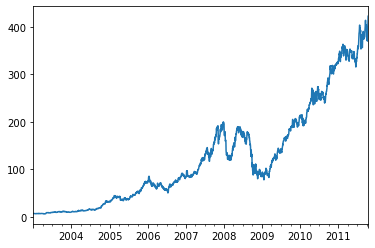

In [238]:
# rolling연산은 resample이나 groupby와 유사하게 작동
# Series나 DataFrame에 대해 원하는 기간을 나타내는 window값과 함께 호출 가능

close_px.AAPL.plot() 

<AxesSubplot:>

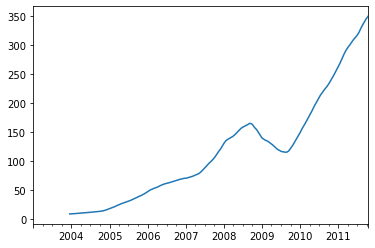

In [239]:
close_px.AAPL.rolling(250).mean().plot() #애플 주가의 250일 이동평균

In [247]:
# rolling함수는 결측치가 없길 기대하지만, 시계열의 시작 지점에서 필연적으로 window보다 적은 데이터를 갖고 있어
# rolling함수의 동작 방식은 변경될 수 있다.

aapl_std250=close_px.AAPL.rolling(250, min_periods=10).std()
aapl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [248]:
# 확장상 평균을 구하기 위해서는 expanding사용
# 시계열의 시작 지점에서부터 창의 크기가 시계열의 전체 크기가 될 때까지 점점 창의 크기를 늘린가.

expanding_mean=aapl_std250.expanding().mean()

<AxesSubplot:>

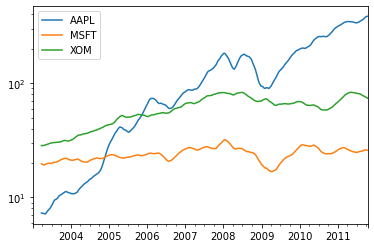

In [242]:
close_px.rolling(60).mean().plot(logy=True) # 주가의 60일 이동평균

In [243]:
# rolling함수는 고정 크기의 기간 지정 문자열을 넘겨 호출 가능
# 빈도가 불규칙한 시계열일 경우 유용하게 사용
# 예) 20일 크기의 이동평균

close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


* 지수 가중 함수

In [249]:
# 다른 방법으로 감쇠인자로 균등한 가중치를 가지는 관찰과 함께 고정 크기 창을 사용
# 감쇠인자는 상수에 좀 더 많은 가중치를 줘서 더 최근 값을 관찰
# 상수 지정은 대부분 기간을 이용, 이 방법은 결과를 같은 기간의 창을 가지는 단순 이동창 함수와 비교 가능하게 해줌
# 지수 가중 통계는 최근 값에 좀 더 많은 가중치를 두는 방법

aapl_px=close_px.AAPL['2006':'2007']

In [250]:
ma60=aapl_px.rolling(30, min_periods=20).mean()

In [251]:
ewma60=aapl_px.ewm(span=30).mean()

<AxesSubplot:>

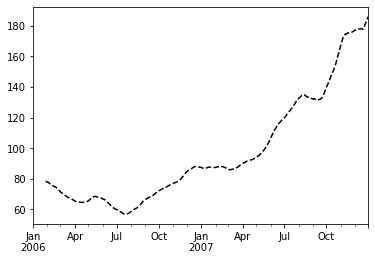

In [262]:
ma60.plot(style='k--',label='Simple MA') # 애플 주가 60일을 이동평균 span=60으로 구한 지수 가중 이동평균과 비교

<AxesSubplot:>

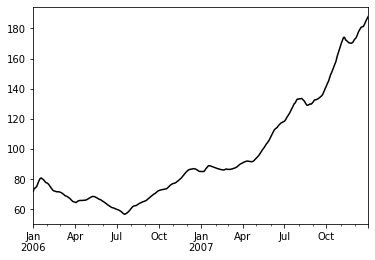

In [263]:
ewma60.plot(style='k-', label='EW MA')

In [257]:
# 상관관계와 공분산 같은 몇몇 통계 연산은 두 개의 시계열 필요
# 예) S&P 500같은 비교 대상이 되는 지수와 주식의 상관관계

spx_px=close_px_all['SPX']

In [258]:
spx_rets=spx_px.pct_change()

In [259]:
returns=close_px.pct_change()

<AxesSubplot:>

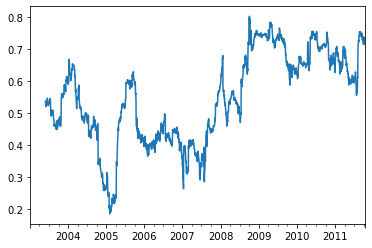

In [260]:
corr=returns.AAPL.rolling(125, min_periods=100).corr(spx_rets) # corr요약함수는 spx_rets와의 상관관계 계산
corr.plot()

<AxesSubplot:>

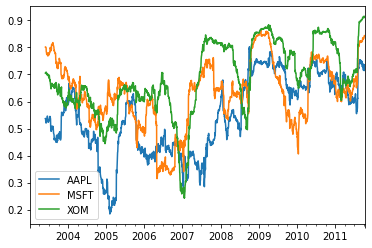

In [265]:
# 예) 여러 주식과 S&P500 지수와의 상관관계를 한 번에 계산

corr=returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

* 사용자 정의 이동창 함수

In [266]:
# rolling이나 다른 관련 메서드에 apply를 호출해 이동창에 대한 사용자 정의 연산 수행 가능
# 단, 사용자 정의 함수가 배열의 각 조각으로부터 단일 값(감소)을 반환해야함

from scipy.stats import percentileofscore

In [269]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

<AxesSubplot:>

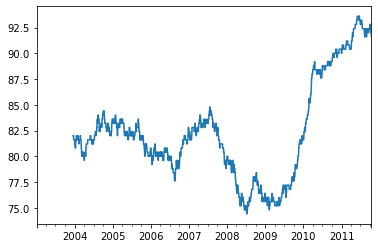

In [270]:
result=returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot() # 2%의 연간 APPL수익률에 대한 백분위 점수